### Dataset fetching and merging 

In [2]:
import pandas as pd
File = pd.read_csv("Personal.csv")
Personal = pd.DataFrame(File)
Personal.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Respondent's Name          118 non-null    object 
 1   Municipality               118 non-null    object 
 2   Ward                       116 non-null    float64
 3   Sex                        117 non-null    object 
 4   Age                        115 non-null    float64
 5   Number of Family members   115 non-null    float64
 6   Educational Qualification  117 non-null    object 
 7   Primary Occupation         116 non-null    object 
 8   Caste                      117 non-null    object 
dtypes: float64(3), object(6)
memory usage: 8.4+ KB


In [3]:
Personal["Educational Qualification"].value_counts()

Educational Qualification
Unofficial Education    81
Higher Secondary        26
Lower Secondary          5
Undergraduate            4
Graduation               1
Name: count, dtype: int64

In [4]:
Personal_SD = Personal[["Municipality", "Sex", "Age", "Educational Qualification"]]
Personal_SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipality               118 non-null    object 
 1   Sex                        117 non-null    object 
 2   Age                        115 non-null    float64
 3   Educational Qualification  117 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.8+ KB


In [5]:
#Importing the data concerning proximity of farm to forest
File = pd.read_csv("Nexus_strip.csv")
Nexus = pd.DataFrame(File)
Nexus.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

colls = Nexus.columns.to_list()
for i, columns in enumerate(colls):
    print(i, columns)

0 Timestamp
1 Form ID
2 Respondent's Name
3 Municipality/VDC
4 Ward
5 Sex
6 Age
7 Number of Family members
8 Educational Qualification
9 Primary Occupation
10 Caste
11 1. What sources of water does your household depend upon to fulfill irrigation needs?
12 2. Do you utilize most of your water endowment in fulfilling irrigation needs?
13 3. Is your household dependent on fossil fuel (diesel pump) or electrical energy for drawing water for fulfilling irrigation needs?
14 4. If yes, please tick the sources of water that require energy to be conducted?
15 5.  Do your sources provide sufficient water to specifically fulfill your irrigation needs?
16 6.  If no, what factors are responsible for causing water stress for fulfilling irrigation needs.
17 7. Have you observed drop in agriculture productivity during years of insufficient water availability?
18 8. If yes, How has insufficiency of water availability affected agricultural productivity?
19 9. What adaptation measures have you adapted t

In [6]:
Farm_to_Forest = Nexus.iloc[:, 26:27]
Farm_to_Forest.rename(columns = {"16.  Is your farm plots close to the local forest or rangeland?": "Proximity of farm to forest"},
                      inplace = True)
Farm_to_Forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Proximity of farm to forest  118 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [7]:
#Now retrieving the target dataset
File = pd.read_csv("Target Manure.csv")
Manure_Choice = pd.DataFrame(File)
Manure_Choice.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
Manure_Choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Manure Choice  117 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [8]:
Manure_Choice = pd.concat([Personal_SD, Farm_to_Forest, Manure_Choice], axis = 1)
Manure_Choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Municipality                 118 non-null    object 
 1   Sex                          117 non-null    object 
 2   Age                          115 non-null    float64
 3   Educational Qualification    117 non-null    object 
 4   Proximity of farm to forest  118 non-null    object 
 5   Manure Choice                117 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.7+ KB


In [9]:
#Since it does not look like imputing the most frequent value is wise for personal data in contrast to perception. We shall delete all null values also
# because our dataset has relatively less null values, and therefore won't affect the sample size

Manure_Choice.dropna(inplace = True) 
Manure_Choice.info()
#Ok, now we have pretty tight dataset

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Municipality                 114 non-null    object 
 1   Sex                          114 non-null    object 
 2   Age                          114 non-null    float64
 3   Educational Qualification    114 non-null    object 
 4   Proximity of farm to forest  114 non-null    object 
 5   Manure Choice                114 non-null    object 
dtypes: float64(1), object(5)
memory usage: 6.2+ KB


### Data Preprocessing

In [10]:
#lets break the dataframe into independent and dependent variables before we proceed with the splitting task
x_value = Manure_Choice.drop(columns = "Manure Choice", axis = 1)
y_value = Manure_Choice["Manure Choice"] #Keep note that this single column will turn into a series and not dataframe unless intervened

from sklearn.model_selection import train_test_split
x_train_eval, x_test, y_train_eval, y_test = train_test_split(x_value,
                                                              y_value,
                                                              test_size=0.40,
                                                              random_state = 0,
                                                              stratify=y_value)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval,
                                                    y_train_eval,
                                                    test_size=0.40,
                                                    random_state = 0,
                                                    stratify = y_train_eval)
print(x_train.shape[0], x_eval.shape[0], x_test.shape[0], y_train.shape[0], y_eval.shape[0], y_test.shape[0]) 

40 28 46 40 28 46


#### Encoding the Independent Variables (OneHotEncoding)

In [11]:
x_train.info()
#first we need to get rid of the float datatype

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 103 to 38
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Municipality                 40 non-null     object 
 1   Sex                          40 non-null     object 
 2   Age                          40 non-null     float64
 3   Educational Qualification    40 non-null     object 
 4   Proximity of farm to forest  40 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.9+ KB


In [12]:
x_train_cat = x_train.select_dtypes(include = "object")
x_eval_cat = x_eval.select_dtypes(include = "object")
x_test_cat = x_test.select_dtypes(include = "object")

from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse_output= False,
                        drop= "first",
                       handle_unknown='ignore')
Encoder.fit(x_train_cat)
Encoded = Encoder.transform(x_train_cat)
Encoded_x_train_cat = pd.DataFrame(Encoded, columns = Encoder.get_feature_names_out(x_train_cat.columns.to_list())) 

Encoded = Encoder.transform(x_eval_cat)
Encoded_x_eval_cat = pd.DataFrame(Encoded, columns = Encoder.get_feature_names_out(x_train_cat.columns.to_list()))

Encoded = Encoder.transform(x_test_cat)
Encoded_x_test_cat = pd.DataFrame(Encoded, columns = Encoder.get_feature_names_out(x_train_cat.columns.to_list()))
Encoded_x_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Municipality_Bheriganga (Surkhet)               46 non-null     float64
 1   Municipality_Budhinanda (Bajura)                46 non-null     float64
 2   Sex_Male                                        46 non-null     float64
 3   Educational Qualification_Undergraduate         46 non-null     float64
 4   Educational Qualification_Unofficial Education  46 non-null     float64
 5   Proximity of farm to forest_Yes                 46 non-null     float64
dtypes: float64(6)
memory usage: 2.3 KB


d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Encoding the Independent Variable (Standardization)

In [13]:
x_train_numeric = x_train.select_dtypes(include= ["int64", "float64"])
x_eval_numeric = x_eval.select_dtypes(include = ["int64", "float64"])
x_test_numeric = x_test.select_dtypes(include = ["int64", "float64"])

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(x_train_numeric)
Scaled = Scaler.transform(x_train_numeric)
Scaled_x_train_numeric = pd.DataFrame(Scaled, columns = x_train_numeric.columns.to_list())

Scaled = Scaler.transform(x_eval_numeric)
Scaled_x_eval_numeric = pd.DataFrame(Scaled, columns = x_train_numeric.columns.to_list())

Scaled = Scaler.transform(x_test_numeric)
Scaled_x_test_numeric = pd.DataFrame(Scaled, columns = x_train_numeric.columns.to_list())
Scaled_x_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     40 non-null     float64
dtypes: float64(1)
memory usage: 452.0 bytes


In [14]:
#Now, merging the encoded and standardized independent batches
Encoded_x_train_df = pd.concat([Encoded_x_train_cat, Scaled_x_train_numeric],
                                  axis = 1)
Encoded_x_eval_df = pd.concat([Encoded_x_eval_cat, Scaled_x_eval_numeric],
                                 axis = 1)
Encoded_x_test_df = pd.concat([Encoded_x_test_cat, Scaled_x_test_numeric],
                                 axis = 1)

#### Encoding the Dependent variables (LabelEncoding)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

Encoded = label_encoder.transform(y_train)
Encoded_y_train_df = pd.DataFrame(Encoded, columns = ["Manure Choice"])

Encoded = label_encoder.transform(y_eval)
Encoded_y_eval_df = pd.DataFrame(Encoded, columns = ["Manure Choice"])

Encoded = label_encoder.transform(y_test)
Encoded_y_test_df = pd.DataFrame(Encoded, columns = ["Manure Choice"])

#Unravelling the label encoding pattern
for i, labels in enumerate(label_encoder.classes_):
    print(i, labels)


0 Chemical Fertilizers only
1 Mix of chemical fertilizers and traditional biomass
2 Traditional biomass only


### Data Analysis (RandomForestClassifier)

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

maxfeatures = int(np.sqrt(x_train.shape[1]))
Estimators = np.arange(10, 160, 10)
Estimated = []

for trees in Estimators:
    rf = RandomForestClassifier(n_estimators= trees,
                                max_features= maxfeatures,
                                max_depth = None,
                                random_state= 0)
    rf.fit(Encoded_x_train_df, Encoded_y_train_df)
    Scores = rf.score(Encoded_x_eval_df, Encoded_y_eval_df)
    Estimated.append(Scores)
print(f"we deployed {maxfeatures} features randomly in each tree")
print(Estimated)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

we deployed 2 features randomly in each tree
[0.7142857142857143, 0.75, 0.75, 0.75, 0.75, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.75, 0.75, 0.75]


In [26]:
#Just juxtaposing the R2scores with the respective number of estimators
for i,scores in enumerate(Estimated):
    print((i+1)*10, scores)

10 0.7142857142857143
20 0.75
30 0.75
40 0.75
50 0.75
60 0.7142857142857143
70 0.7142857142857143
80 0.7142857142857143
90 0.7142857142857143
100 0.7142857142857143
110 0.7142857142857143
120 0.7142857142857143
130 0.75
140 0.75
150 0.75


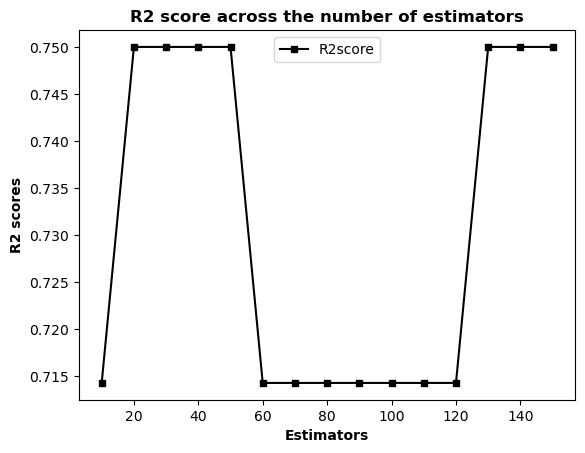

It looks like some form of oscillation


In [17]:
#Now graphing the scores against the number of trees that were deployed for each forest
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(Estimators,
        Estimated,
        marker = "s",
        markersize = 5,
        color = "black",
        label = "R2score")
ax.set_title("R2 score across the number of estimators",
             fontweight = "bold")
ax.set_xlabel("Estimators",
              fontweight = "bold")
ax.set_ylabel("R2 scores",
              fontweight = "bold")
ax.legend(loc = "upper center")
plt.show()
print("It looks like some form of oscillation")

In [18]:
#Now deploying the highest number of estimators to test the model in the unseen/test data
rf = RandomForestClassifier(n_estimators=150,
                            max_features = maxfeatures,
                            max_depth = None,
                            random_state = 0)
rf.fit(Encoded_x_train_df, Encoded_y_train_df)
test_score = rf.score(Encoded_x_test_df, Encoded_y_test_df)
test_score
print(f"It appears our classifier model is only able explain {round((test_score*100),2)} percent of the variance of the unseen test batch")

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


It appears our classifier model is only able explain 67.39 percent of the variance of the unseen test batch


In [19]:
#Checking the significance of the features in the development of our classifier model nevertheless
Feature_Importances = rf.feature_importances_
Feature_Importances = pd.DataFrame(Feature_Importances)
Feature_Importances = Feature_Importances.T
Feature_Importances.columns = Encoded_x_train_df.columns.to_list()
Feature_Importances = Feature_Importances.T 
Feature_Importances.reset_index(inplace = True)
Feature_Importances.columns = ["Features", "Significance"]
Feature_Importances = Feature_Importances.sort_values(ascending = True, by = "Significance")
Feature_Importances

,Features,Significance
3,Educational Qualification_Undergraduate,0.023431
2,Sex_Male,0.039708
5,Proximity of farm to forest_Yes,0.048031
4,Educational Qualification_Unofficial Education,0.057659
0,Municipality_Bheriganga (Surkhet),0.130701
6,Age,0.322127
1,Municipality_Budhinanda (Bajura),0.378343


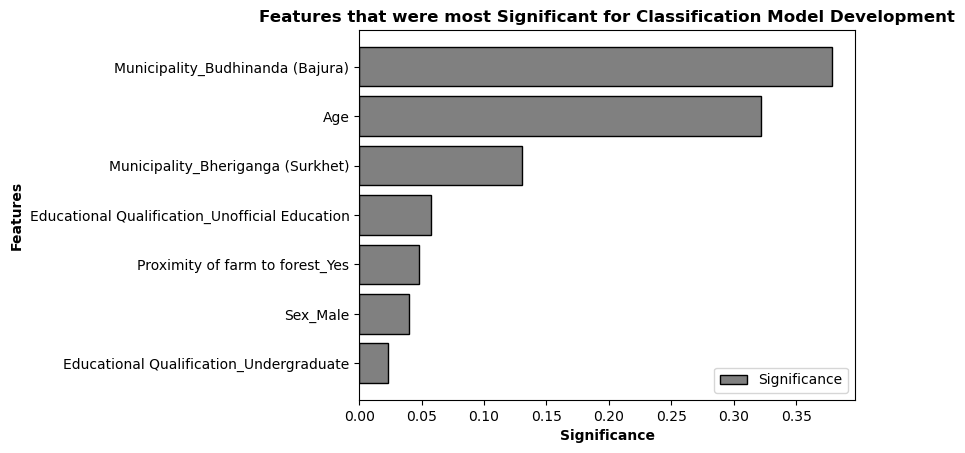

In [20]:
#Now horizontally bargraphing the feature significances
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(Feature_Importances["Features"],
        Feature_Importances["Significance"],
        color = "grey",
        edgecolor = "black",
        label = "Significance")
ax.set_title("Features that were most Significant for Classification Model Development",
             fontweight = "bold")
ax.set_xlabel("Significance",
              fontweight = "bold")
ax.set_ylabel("Features",
              fontweight = "bold")
ax.legend()
plt.show()

In [21]:
#Now preparing the classification report
Encoded_y_test_df_hat = rf.predict(Encoded_x_test_df)
Unencodd_y_test_df_hat = label_encoder.inverse_transform(Encoded_y_test_df_hat)

from sklearn.metrics import classification_report
print(classification_report(Unencodd_y_test_df_hat, y_test))

                                                     precision    recall  f1-score   support

                          Chemical Fertilizers only       0.00      0.00      0.00         0
Mix of chemical fertilizers and traditional biomass       0.86      0.71      0.77        34
                           Traditional biomass only       0.41      0.58      0.48        12

                                           accuracy                           0.67        46
                                          macro avg       0.42      0.43      0.42        46
                                       weighted avg       0.74      0.67      0.70        46



d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


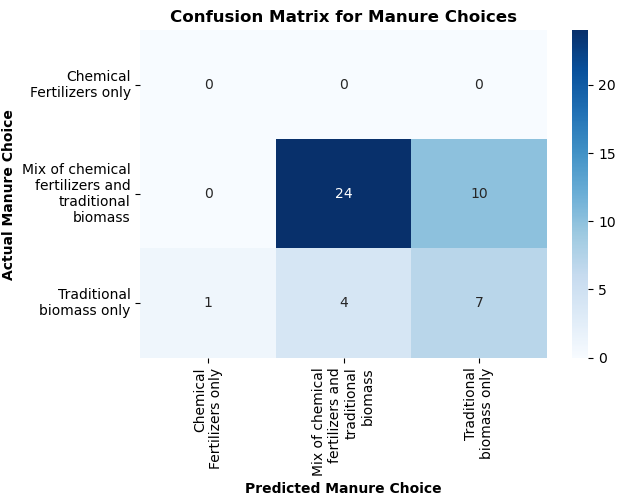

In [27]:
#Now producing the confusion matrix likewise
from sklearn.metrics import confusion_matrix
Conf_matrx = confusion_matrix(Unencodd_y_test_df_hat, y_test)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.heatmap(Conf_matrx,
            annot= True,
            cmap = "Blues",
            xticklabels = label_encoder.classes_,
            yticklabels= label_encoder.classes_,
            ax=ax)
ax.set_title("Confusion Matrix for Manure Choices",
             fontweight = "bold")
ax.set_xlabel("Predicted Manure Choice",
              fontweight = "bold")
ax.set_ylabel("Actual Manure Choice",
              fontweight = "bold")

xticklabels = ax.get_xticklabels()
for label in xticklabels:
    label.set_wrap(True)
    label.set_ha("right")
    label.set_va("center")

yticklabels = ax.get_yticklabels()
for label in yticklabels:
    label.set_wrap(True)
    label.set_ha("right")
    label.set_va("center")

plt.tight_layout()
plt.show()
